# 8장

## 8.1 상관분석

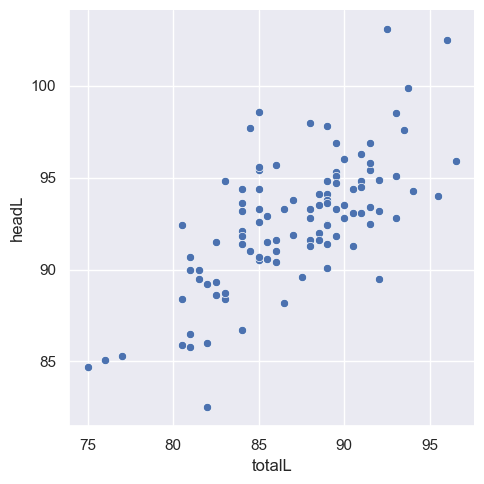

In [2]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
possum = pd.read_table("possum.txt", sep = '\t')
sns.set(rc={'figure.figsize':(3,3)})
sns.relplot(x = 'totalL', y = 'headL', data = possum, kind="scatter")
plt.show()

In [3]:
# 상관계수 행렬 출력
possum.loc[:,['totalL','headL']].corr(method='pearson')

,totalL,headL
totalL,1.000000,0.691094
headL,0.691094,1.000000


In [4]:
# 상관분석 : 상관관계의 유무에 관한 검정
pearsonr(possum['headL'], possum['totalL'])
r, p = pearsonr(possum['headL'], possum['totalL'])
print("Pearson's correlation coefficient: %s, p-value: %s" % (round(r, 5), round(p, 5)))
possum.loc[:,['totalL','headL']].corr(method='pearson')

Pearson’s correlation coefficient: 0.69109, p-value: 0.0


,totalL,headL
totalL,1.000000,0.691094
headL,0.691094,1.000000


## 8.2 단순선형회귀모형

In [7]:
# 데이터프레임 생성
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
possum = pd.read_table("possum.txt", sep = '\t')

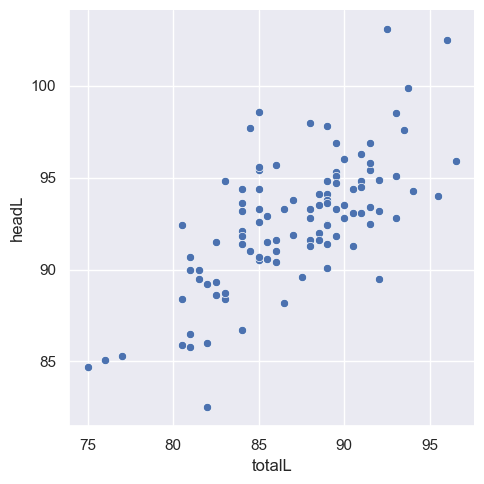

In [8]:
sns.set(rc={'figure.figsize':(3,3)})
sns.relplot(x = 'totalL', y = 'headL', data = possum, kind="scatter")
plt.show()

In [9]:
from statsmodels.formula.api import ols
model = ols("headL ~ totalL", possum).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  headL   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     93.26
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.68e-16
Time:                        13:13:16   Log-Likelihood:                -245.75
No. Observations:                 104   AIC:                             495.5
Df Residuals:                     102   BIC:                             500.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.7098      5.173      8.257      0.0

In [10]:
import statsmodels.api as sm
table = sm.stats.anova_lm(model)
print(table)

             df      sum_sq     mean_sq          F        PR(>F)
totalL      1.0  628.148138  628.148138  93.256604  4.680579e-16
Residual  102.0  687.040996    6.735696        NaN           NaN


In [11]:
# 평균반응에 대한 추론
prediction = model.get_prediction()
prediction.summary_frame(alpha=0.05).round(3) 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,93.698,0.279,93.145,94.251,88.521,98.875
1,95.130,0.365,94.406,95.854,89.932,100.329
2,97.422,0.560,96.311,98.533,92.156,102.688
3,95.417,0.387,94.649,96.184,90.212,100.621
4,91.693,0.271,91.155,92.231,86.517,96.869
...,...,...,...,...,...,...
99,89.401,0.418,88.572,90.230,84.187,94.615
100,89.974,0.373,89.235,90.713,84.774,95.175
101,93.698,0.279,93.145,94.251,88.521,98.875
102,89.974,0.373,89.235,90.713,84.774,95.175


## 8.3 잔차분석

In [12]:
# 적합값, 잔차, 표준화잔차
fitted = model.fittedvalues
residual = model.resid
rstandard = model.resid_pearson
pd.DataFrame({'Fitted':fitted, 'Residual': residual, 'Rstandard':rstandard })

,Fitted,Residual,Rstandard
0,93.698007,0.401993,0.154891
1,95.130261,-2.630261,-1.013462
2,97.421866,-3.421866,-1.318474
3,95.416711,-2.216711,-0.854118
4,91.692853,-0.192853,-0.074308
...,...,...,...
99,89.401248,0.098752,0.038050
100,89.974149,-1.374149,-0.529472
101,93.698007,-1.298007,-0.500134
102,89.974149,1.525851,0.587924


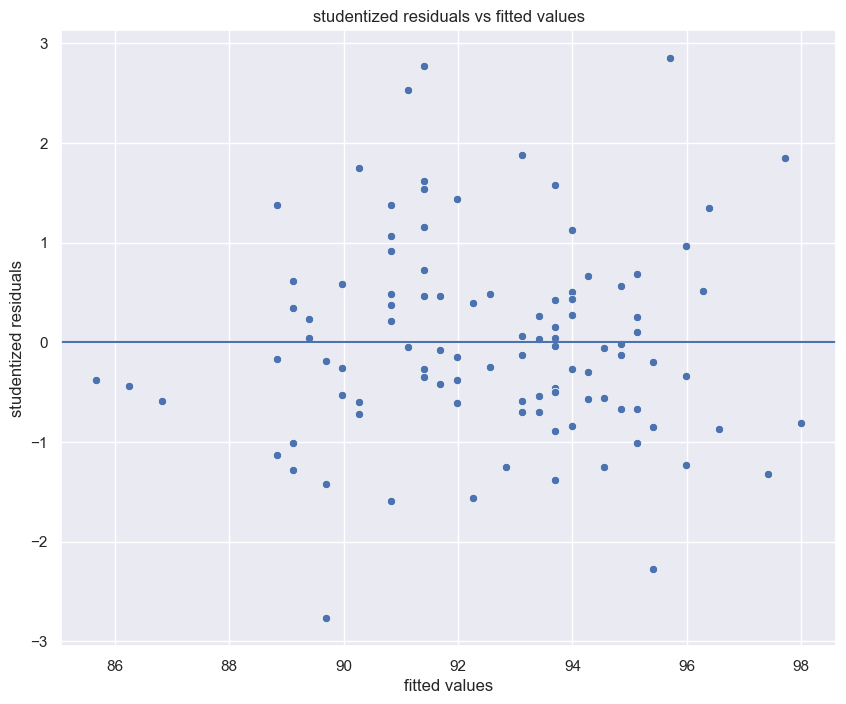

In [13]:
# 등분산성 검토 : 표준화잔차 vs 적합값 그래프
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=fitted, y=rstandard)
ax.axhline(y=0)
plt.title("studentized residuals vs fitted values")
plt.ylabel("studentized residuals")
plt.xlabel("fitted values")
plt.show()


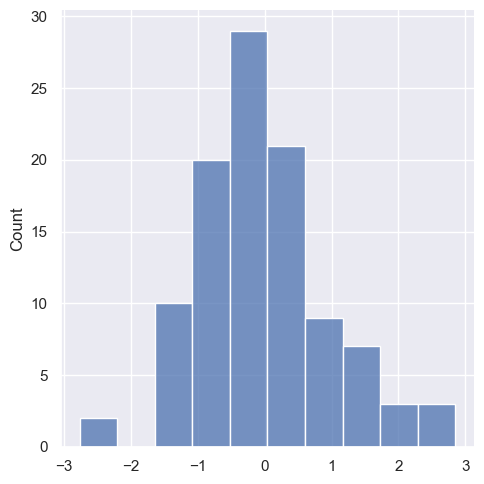

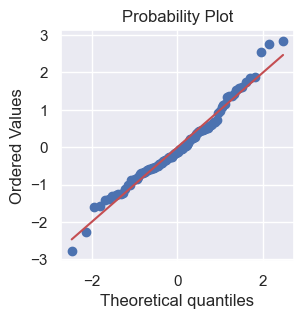

In [20]:
# 정규성 검토
sns.displot(rstandard, bins=10)
plt.show()
from scipy.stats import probplot
probplot(rstandard, plot = plt)
plt.show()

In [15]:
# 독립성 검토
from statsmodels.stats.stattools import durbin_watson
durbin_watson(rstandard)

1.8812469078214327

## 8.4 중회귀분석

In [21]:
# 데이터 불러오기
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
iqsize = pd.read_table("iqsize.txt", sep = ' ')

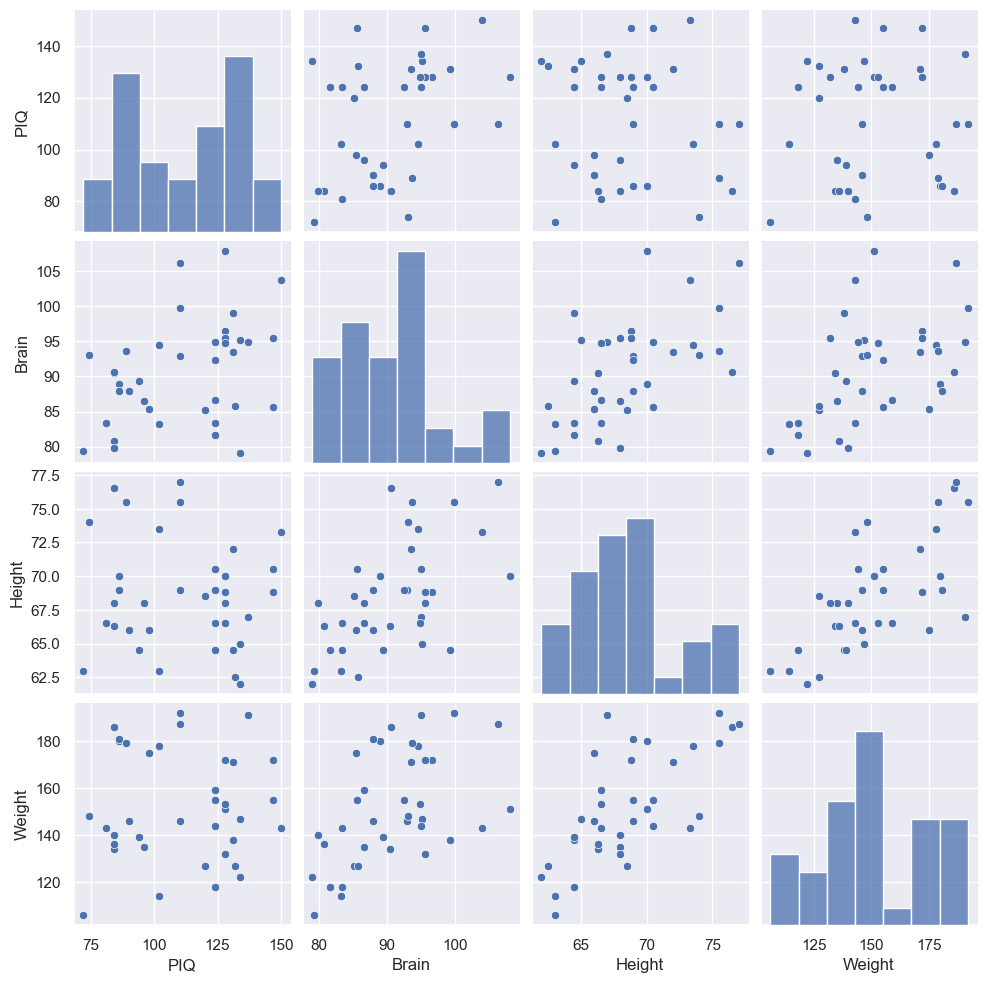

In [22]:
sns.pairplot(data = iqsize)
plt.show()

In [23]:
iqsize.corr(method='pearson')

,PIQ,Brain,Height,Weight
PIQ,1.000000,0.377815,-0.093156,0.002512
Brain,0.377815,1.000000,0.588367,0.513487
Height,-0.093156,0.588367,1.000000,0.699614
Weight,0.002512,0.513487,0.699614,1.000000


In [24]:
# 상관분석 실시
t, p = stats.pearsonr(iqsize['PIQ'], iqsize['Brain'])
print("Pearson's correlation coefficient: %s, p-value: %s" % (round(t,5), round(p,5)))

Pearson’s correlation coefficient: 0.37782, p-value: 0.01935


In [25]:
# 중회귀분석
from statsmodels.formula.api import ols
model2 = ols("PIQ ~ Brain + Height + Weight", iqsize).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Fri, 26 May 2023   Prob (F-statistic):            0.00722
Time:                        13:17:40   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.0

In [29]:
# 적합값, 잔차, 표준화잔차
fitted2 = model2.fittedvalues
residual2 = model2.resid
rstandard2 = model2.resid_pearson
x = pd.DataFrame({'Fitted':fitted2, 'Residual': residual2,'Rstandard':rstandard2})
x.describe()

,Fitted,Residual,Rstandard
count,38.000000,3.800000e+01,3.800000e+01
mean,111.342105,1.286456e-13,6.490422e-15
std,12.272519,1.897495e+01,9.586026e-01
min,89.113804,-3.274433e+01,-1.654223e+00
25%,103.435329,-1.208881e+01,-6.107188e-01
50%,109.514277,-3.840432e+00,-1.940162e-01
75%,119.865008,1.416851e+01,7.157840e-01
max,142.619713,5.169019e+01,2.611356e+00


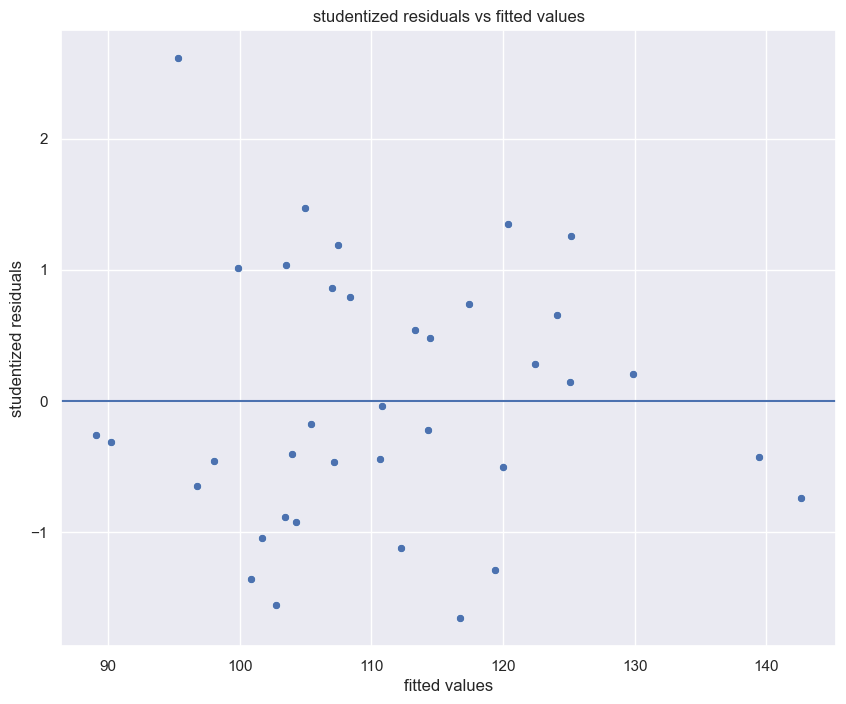

In [28]:
# 등분산성 검토 : 표준화잔차 vs 적합값 그래프
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=fitted2, y=rstandard2)
ax.axhline(y=0)
plt.title("studentized residuals vs fitted values")
plt.ylabel("studentized residuals")
plt.xlabel("fitted values")
plt.show()

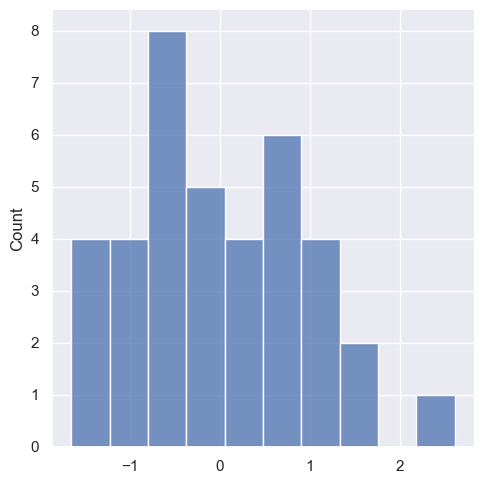

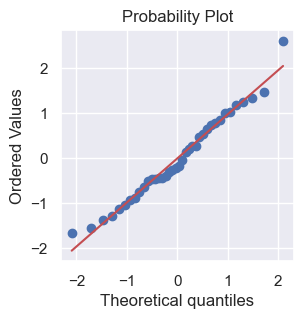

In [30]:
# 정규성 검토
sns.displot(rstandard2, bins=10)
plt.show()
from scipy.stats import probplot
probplot(rstandard2, plot = plt)
plt.show()

In [31]:
# 독립성 검토
from statsmodels.stats.stattools import durbin_watson
durbin_watson(rstandard2)

1.826876930756517

## 8.5 자료를 이용한 예제

* 예제1.(handspan.txt) 다음은 167명의 학생들에 대해 성별(Sex)과 신장(Height) 그리고 손 한뼘의 길이(HandSpan)를 측정한 자료이다. 
    - (1) 신장과 손 한뼘의 길이는 서로 상관관계가 존재하는가? 표본 상관계수를 구하고 두 변수의 산점도를 그려보자. 두 변수 사이에 선형적 연관성이 존재하는가?
    - (2) 신장과 손 한뼘의 길이사이에 상관관계가 존재하는지 유의수준 5%에서 검정하여라. - (3) 신장(y)과 손 한뼘의 길이(x)에 대해 단순선형회귀모형을 적용해보자. 추정된 회귀식을 구하고 유의수준 5%에서 회귀 직선의 유의성을 검정하시오. 
    - (4) 단순 선형 회귀모형의 적용은 타당한가? 잔차도를 이용하여 답하시오. 

* 예제2. (hospital.txt) 다음은 미국 내 113개의 병원들을 대상으로 입원 기간 동안 환자들이 받는 감염 위험과 관련된 사항들을 조사하였다. 다음은 주요 변수에 대한 설명이다.
    - (1) 종속변수와 각 설명변수들 간에는 유의한 상관관계가 존재하는가? 산점도와 상관분석을 통해 이를 확인해보시오. 
    - (2) 주어진 자료에 다중선형회귀모형을 적용해보자. 유의수준 5%에서 모형은 유의하다고 할 수 있는가? 각 변수들은 유의한가?
    - (3) 다중선형회귀모형의 적용은 타당하다고 볼 수 있는가?

<div style="text-align:center">

|변수명 | 생존|
|:---:|:---:|
|InfctRsk|종속변수. 감염 위험 정도|
|Stay|설명변수1. 환자들의 평균 입원 기간|
|Age|설명변수2. 환자들의 평균 나이|
|Xray|설명변수3. 해당 병원의 X-ray 검진 횟수|

</div>